<a href="https://colab.research.google.com/github/MadsYDL/intro-to-software-development/blob/main/Boring%C3%98Hydraulics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


data = {
    "Fann_RPM": [3, 6, 100, 200, 300, 600],
    "Fann_Reading": [1.5, 4, 9, 14, 21, 34]
}

df_Fann = pd.DataFrame(data).set_index("Fann_RPM")

import pandas as pd

data = {
    "Parameter": [
        "Mud Weight (MW)",
        "Flow Rate",
        "Pump Efficiency",
        "Max Surface Pressure",
        "Surface Piping Equivalent Length",
        "Minimum Annular Velocity",
        "Friction Factor (f)",
        "Discharge Coefficient (Cd)"
    ],
    "Value": [
        13,      # ppg
        550,     # gpm
        0.90,    # efficiency
        5000,    # psi
        220,     # ft
        120,     # ft/min
        0.00601, # -
        0.98     # -
    ],
    "Units": [
        "ppg",
        "gpm",
        "-",
        "psi",
        "ft",
        "ft/min",
        "-",
        "-"
    ]
}

df_H = pd.DataFrame(data)
df_H = df_H.set_index("Parameter").T
df_H = df_H.reindex(["Value", "Units"])

df_H

Parameter,Mud Weight (MW),Flow Rate,Pump Efficiency,Max Surface Pressure,Surface Piping Equivalent Length,Minimum Annular Velocity,Friction Factor (f),Discharge Coefficient (Cd)
Value,13.0,550.0,0.9,5000.0,220.0,120.0,0.00601,0.98
Units,ppg,gpm,-,psi,ft,ft/min,-,-


In [ ]:
import pandas as pd

# --- Drill Pipe ---
drillpipe_data = {
    "Grade": ["E75"],
    "Weight_per_ft_lbft": [19.5],
    "OD_in": [5.0],
    "ID_in": [4.276],
    "Length_ft": [10500-500],
    "Type": ["Pipe"]
}
drillpipe_df = pd.DataFrame(drillpipe_data)

# --- Drill Collar ---
dc_data = {
    "OD_in": [6.5],
    "ID_in": [3.0],
    "Weight_per_ft_lbft": [89.0],
    "Length_ft": [500],
    "Top_TVD_ft": [10000],
    "Type": ["Pipe"]
}
dc_df = pd.DataFrame(dc_data)


#=====================================


# --- Casing  - DP --
Ann_DP_data = {
    "OD_in": [12.8],
    "ID_in": [5.0],
    "Shoe_TVD_ft": [6000],
    "Length_ft": [6000],

    "Type": ["Annular"]
}
casing_to_DP_df = pd.DataFrame(Ann_DP_data)


# --- Open hole - DP ---
Hole_DP_data = {
    "OD_in": [8.5],
    "ID_in": [5],
    "Length_ft": [10500-6000-500],

    "Type": ["Annular"]
}
Hole_to_DP_df = pd.DataFrame(Hole_DP_data)

# --- Open hole ---
Hole_DC_data = {
    "OD_in": [8.5],
    "ID_in": [6.5],
    "Length_ft": [500],

    "Type": ["Annular"]
}
Hole_to_DC_df = pd.DataFrame(Hole_DC_data)


#=====================================


# --- Bit ---
bit_data = {
    "TVD_ft": [10500],
    "Diameter_in": [8.5],
    "Nozzle_Size_in": [13/32],
    "Nozzle_Count": [3],
    "Length_ft": [0],

    "Type": ["Bit"]
}
bit_df = pd.DataFrame(bit_data)

drilling_components = {
    "DP": drillpipe_df,
    "DC": dc_df,
    "Bit": bit_df,
    "H-DC": Hole_to_DC_df,
    "H-DP": Hole_to_DP_df,
    "C-DP": casing_to_DP_df,


}

for key,df in drilling_components.items():
  print(key, ':', df)

DP :   Grade  Weight_per_ft_lbft  OD_in  ID_in  Length_ft  Type
0   E75                19.5    5.0  4.276      10000  Pipe
DC :    OD_in  ID_in  Weight_per_ft_lbft  Length_ft  Top_TVD_ft  Type
0    6.5    3.0                89.0        500       10000  Pipe
Bit :    TVD_ft  Diameter_in  Nozzle_Size_in  Nozzle_Count  Length_ft Type
0   10500          8.5         0.40625             3          0  Bit
H-DC :    OD_in  ID_in  Length_ft     Type
0    8.5    6.5        500  Annular
H-DP :    OD_in  ID_in  Length_ft     Type
0    8.5      5       4000  Annular
C-DP :    OD_in  ID_in  Shoe_TVD_ft  Length_ft     Type
0   12.8    5.0         6000       6000  Annular


In [ ]:

def V_pipe_OF_to_SI(q_gpm,d_i):
  q_m3s = q_gpm * 6.309e-5
  d_m = d_i * 0.0254
  A = np.pi * (d_m ** 2) / 4

  V = q_m3s / A

  return V


def V_Annular_OF_to_SI(q_gpm,OD_i,ID_i):
  q_m3s = q_gpm * 6.309e-5
  OD_m,ID_m = OD_i*0.0254,ID_i*0.0254
  A = np.pi * (OD_m**2-ID_m**2) / 4

  V = q_m3s / A

  return V


def V_pipe_OF(Q_gpm, ID_i):
  return 1/2.4479* Q_gpm / (ID_i ** 2)


def V_annular_OF(Q_gpm, OD_i, ID_i):

    area_term = (OD_i ** 2 - ID_i ** 2)
    return 1/2.4479* Q_gpm / area_term



def Re_pipe_OF(V,ID_i,rho,K,n):
  return 89100*rho*V**(2-n)/K*(0.0416*ID_i/(3+1/n))**n


def Re_annular_OF(V,OD,ID,rho,K,n):
  return 109000*rho*V**(2-n)/K*(0.0208*(OD-ID)/(3+1/n))**n


def Laminar_DP_pipe_OF(V,ID_i,K,n,L):
  return K*V**n/144000/ID_i**(n+1)*((3+1/n)/0.0416)**n*L

def Laminar_DP_annular_OF(V,OD_i,ID_i,K,n,L):
  return K*V**n/144000/(OD_i-ID_i)**(n+1)*((2+1/n)/0.0208)**n*L

def Turbulent_DP_pipe_OF(V,rho,ID_i,f,L):
  return f*rho*V**2/25.8/ID_i*L

def Turbulent_DP_annular_OF(V,rho,OD_i,ID_i,f,L):
  return f*rho*V**2/21.1/(OD_i-ID_i)*L




def DP_bit_OF(Q_gpm, rho_ppg, Cd, nozzle_diam_in, N_nozzles):

    A_t = (np.pi / 4.0) * N_nozzles * (nozzle_diam_in ** 2)
    return 8.311*10**-5 * rho_ppg * (Q_gpm / (Cd * A_t))**2



def ECD_OF(rho_ppg,DP_annulus,TVD,g=9.81):
  return rho_ppg + DP_annulus/TVD/0.052


In [ ]:
Nozzle_count = drilling_components['Bit'].loc[0, "Nozzle_Count"]
Nozzle_size = drilling_components['Bit'].loc[0, "Nozzle_Size_in"]
print(Nozzle_count,Nozzle_size)

3 0.40625


In [ ]:
import numpy as np

Pressure_losses = {}
Section_Velocity = {}
Section_Re = {}

# --- Fluid Initialization ---
Q_gpm = df_H.loc["Value", "Flow Rate"]
n = np.log(df_Fann.loc[600, "Fann_Reading"] / df_Fann.loc[300, "Fann_Reading"]) / np.log(2)
K = 510 * df_Fann.loc[300, "Fann_Reading"] / 511**n
rho = df_H.loc["Value", "Mud Weight (MW)"]
# Re_crit = 3470*(n/(3*n+1))
Re_crit = 2100
f = df_H.loc["Value", "Friction Factor (f)"]
Cd = df_H.loc["Value", "Discharge Coefficient (Cd)"]

for name, df in drilling_components.items():
    comp_type = df.loc[0, "Type"]

    if comp_type == "Pipe":
        ID = df.loc[0, "ID_in"]
        L  = df.loc[0, "Length_ft"]

        V = V_pipe_OF(Q_gpm, ID)
        N_Re = Re_pipe_OF(V, ID, rho, K, n)

        # store velocity and Re
        Section_Velocity[name] = V
        Section_Re[name] = N_Re


        if N_Re > Re_crit:
            dP = Turbulent_DP_pipe_OF(V, rho, ID, f, L)
            print(name, ": Turbulent flow")
        else:
            dP = Laminar_DP_pipe_OF(V, ID, K, n, L)
            print(name, ": Laminar flow")

        Pressure_losses[name] = dP

    elif comp_type == "Annular":
        ID = df.loc[0, "ID_in"]
        OD = df.loc[0, "OD_in"]
        L  = df.loc[0, "Length_ft"]

        V = V_annular_OF(Q_gpm, OD, ID)
        N_Re = Re_annular_OF(V, OD, ID, rho, K, n)

        Section_Velocity[name] = V
        Section_Re[name] = N_Re

        if N_Re > Re_crit:
            dP = Turbulent_DP_annular_OF(V, rho, OD, ID, f, L)
            print(name, ": Turbulent flow")
        else:
            dP = Laminar_DP_annular_OF(V, OD, ID, K, n, L)
            print(name, ": Laminar flow")

        Pressure_losses[name] = dP

    elif comp_type == "Bit":
        Nozzle_count = df.loc[0, "Nozzle_Count"]
        Nozzle_size  = df.loc[0, "Nozzle_Size_in"]  # in

        dP = DP_bit_OF(Q_gpm, rho, Cd, Nozzle_size, Nozzle_count)

        Pressure_losses[name] = dP

    else:
        print(f"{name}: Unknown")

print("section Velocities")


for k, v in Section_Velocity.items():
    print(f"{k:5s} : {float(v):8.2f} ft/s")

print("section Re")

for k, v in Section_Re.items():
    print(f"{k:5s} : {float(v):8.2f} -")

print("section pressure losses ")

for k, v in Pressure_losses.items():
    print(f"{k:5s} : {float(v):8.2f} psi")


DP : Turbulent flow
DC : Turbulent flow
H-DC : Turbulent flow
H-DP : Turbulent flow
C-DP : Laminar flow
section Velocities
DP    :    12.29 ft/s
DC    :    24.96 ft/s
H-DC  :     7.49 ft/s
H-DP  :     4.76 ft/s
C-DP  :     1.62 ft/s
section Re
DP    : 23292.40 -
DC    : 45908.91 -
H-DC  :  5438.72 -
H-DP  :  4436.30 -
C-DP  :  1897.28 -
section pressure losses 
DP    :  1069.42 psi
DC    :   314.56 psi
Bit   :  2250.47 psi
H-DC  :    51.92 psi
H-DP  :    95.69 psi
C-DP  :     8.75 psi


In [ ]:
#LOSS AT CURRENT DEPTH
print('Drillstring loss = ',Pressure_losses['DP']+Pressure_losses['DC']+Pressure_losses['Bit'],'psi')

Drillstring loss =  3634.4503157381964 psi


In [ ]:
Aloss = Pressure_losses['C-DP']+Pressure_losses['H-DP']+Pressure_losses['H-DC']
print('Annulues pressure loss = ',Aloss,'psi')
print('ECD = ', ECD_OF(rho,Aloss,drilling_components['Bit'].loc[0,'TVD_ft']),'ppg')

Annulues pressure loss =  156.36258462151687 psi
ECD =  13.286378360112668 ppg


In [ ]:
tot_DP = sum([dp for name,dp in Pressure_losses.items()])
print('% Pressure loss through bit = ', Pressure_losses['Bit']/tot_DP*100,'%')


% Pressure loss through bit =  59.36654083366514 %


In [ ]:
P_0 = df_H.loc["Value", "Max Surface Pressure"]
P_0

5000.0

In [ ]:

L_internal = 0
L_external = 0

DP_down = 0
DP_up = 0

P_0 = df_H.loc["Value", "Max Surface Pressure"]

End_pressures = []


drilling_components['Bit']['end_depth'] = drilling_components['Bit']['TVD_ft']

for name, df in drilling_components.items():
  if df.loc[0,'Type'] == 'Pipe':
    L_internal += df.loc[0,'Length_ft']
    drilling_components[name]['end_depth'] = L_internal

    DP_down += Pressure_losses[name]
    End_pressures.append(P_0-DP_down+0.052*rho*L_internal)

  elif df.loc[0,'Type'] == 'Annular':
    L_external += df.loc[0,'Length_ft']
    drilling_components[name]['end_depth'] = drilling_components['Bit']['TVD_ft'] - L_external

    DP_up += Pressure_losses[name]
    End_pressures.append(P_0-DP_up-0.052*rho*L_external)


drilling_components

{'DP':   Grade  Weight_per_ft_lbft  OD_in  ID_in  Length_ft  Type  end_depth
 0   E75                19.5    5.0  4.276      10000  Pipe      10000,
 'DC':    OD_in  ID_in  Weight_per_ft_lbft  Length_ft  Top_TVD_ft  Type  end_depth
 0    6.5    3.0                89.0        500       10000  Pipe      10500,
 'Bit':    TVD_ft  Diameter_in  Nozzle_Size_in  Nozzle_Count  Length_ft Type  \
 0   10500          8.5         0.40625             3          0  Bit   
 
    end_depth  
 0      10500  ,
 'H-DC':    OD_in  ID_in  Length_ft     Type  end_depth
 0    8.5    6.5        500  Annular      10000,
 'H-DP':    OD_in  ID_in  Length_ft     Type  end_depth
 0    8.5      5       4000  Annular       6000,
 'C-DP':    OD_in  ID_in  Shoe_TVD_ft  Length_ft     Type  end_depth
 0   12.8    5.0         6000       6000  Annular          0}

In [ ]:
Pressure_losses.keys()

dict_keys(['DP', 'DC', 'Bit', 'H-DC', 'H-DP', 'C-DP'])

In [ ]:
import numpy as np

L_internal = 0.0
L_external = 0.0
DP_down = 0.0
DP_up = 0.0
profile_depths = [0]

P_0 = df_H.loc["Value", "Max Surface Pressure"]

profile_pressures = [P_0]

TVD_bit = drilling_components["Bit"].loc[0, "TVD_ft"]

P_bit_in = None
P_bh_ann = None

for name, df in drilling_components.items():
    comp_type = df.loc[0, "Type"]

    if comp_type == "Pipe":
        L = df.loc[0, "Length_ft"]
        L_internal += L #decending
        DP_down += Pressure_losses[name]

        P_here = P_0 - DP_down + 0.052 * rho * L_internal

        depth_here = L_internal
        profile_depths.append(depth_here)
        profile_pressures.append(P_here)


        P_bit_in = P_here

    elif comp_type == "Bit":
        dP_bit = Pressure_losses[name]
        P_bh_ann = P_bit_in - dP_bit

        depth_here = TVD_bit
        profile_depths.append(depth_here)
        profile_pressures.append(P_bh_ann)

    elif comp_type == "Annular":
        L = df.loc[0, "Length_ft"]
        L_external += L #acending
        DP_up += Pressure_losses[name]

        P_here = P_bh_ann - DP_up - 0.052 * rho * L_external

        depth_here = TVD_bit - L_external
        profile_depths.append(depth_here)
        profile_pressures.append(P_here)

    else:
        pass



In [ ]:
for name, df in drilling_components.items():
  print(name)

DP
DC
Bit
H-DC
H-DP
C-DP


In [ ]:
print(profile_depths)
print(profile_pressures)

[0, np.float64(10000.0), np.float64(10500.0), np.int64(10500), np.float64(10000.0), np.float64(6000.0), np.float64(0.0)]
[5000.0, np.float64(10690.581555990559), np.float64(10714.024172681697), np.float64(8463.549684261801), np.float64(8073.6253541165515), np.float64(5273.93641831276), np.float64(1209.1870996402859)]


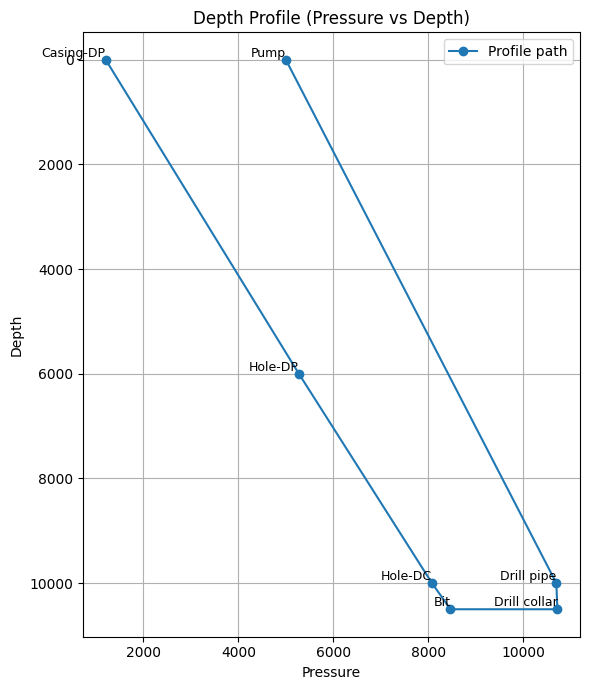

In [ ]:
labels = ["Pump", "Drill pipe", "Drill collar", "Bit", "Hole-DC", "Hole-DP", "Casing-DP"]



plt.figure(figsize=(6, 7))
plt.plot(profile_pressures, profile_depths, '-o', label='Profile path')


for label, x, y in zip(labels, profile_pressures, profile_depths):
    plt.text(x, y, label, fontsize=9, ha='right', va='bottom')

plt.xlabel('Pressure')
plt.ylabel('Depth')
plt.title('Depth Profile (Pressure vs Depth)')
plt.legend()
plt.grid(True)


plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

